# Transformer and BERT

- <sub>Vaswani et al., [Attention is All you Need.](https://papers.nips.cc/paper/7181-attention-is-all-you-need) NIPS 2017: 5998-6008</sub>
- <sub>Devlin et al., [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding.](https://www.aclweb.org/anthology/N19-1423/) NAACL-HLT (1) 2019: 4171-4186</sub>

---

- [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)
- [The Illustrated BERT, ELMo ...](https://jalammar.github.io/illustrated-bert/)
- [The Annotated Transformer](http://nlp.seas.harvard.edu/2018/04/03/attention.html)

---

This last part of the tutorial is about a new network architechture called the Transformer and a specific version of that called BERT. I'm not going to go through the transformer architechture in detail as there are already plenty of resources that do so, some in excruciating detail (see links). Instead, I'm going to cover two specific aspects of the architecture that I found rather unintuitive or was unable to find satisfactory explanations for elsewhere: the specific attention model of BERT and the input encoding that is used.

There's going to be some slides and some code examples and right in the end I'll show some real world results from the data from where I work.

![24 hours in Finland]()

But first, please bare with me for a short digression about language. I think it's important to understand what these deep networks are meant to be learning versus what they may or may not be learning.

If you find this digression unbearable I hope you'll at least enjoy the pretty pictures - this is 24 hours in Finland during the summer, with about 23 hours of sunlight.


Computational linguistics as a field has relatively recently moved drastically away from explicit representation of meaning towards implicit, learned representations. One example of this is word vectors or embeddings that aim to encode distributional similarity and facilitate distributional composition. So for instance, you take embedding for "red" and the embedding for "car" put them together and you get something that should be similar to say "ferrari".

![A Ferrari](ferrari-miniature-red-35964.jpg)

This is extremely convenient as it gives you arithmetic tools to work with "meaning", but it's also just single units (words) not larger collections like documents etc. Word vectors are not the only way to represent or encode meaning.

In [132]:
import spacy
nlp = spacy.load('en')

In [134]:
doc = nlp("PyData Berlin is lovely group.")
spacy.displacy.render(doc, style='dep')

In [94]:
%matplotlib inline

import matplotlib as mpl

mpl.rc('figure', figsize=(10, 6))

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([('groups', 'lovely', {'label': 'amod'}),
                  ('music', 'lovely', {'label': 'amod'}),
                  ('gesture', 'lovely', {'label': 'amod'}),
                  ('music', 'blue', {'label': 'amod'}),
                  ('music', 'loud', {'label': 'amod'}),
                  ('people', 'old', {'label': 'amod'}),
                  ('people', 'young', {'label': 'amod'}),
                 ])

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.shell_layout(G, scale=15)

edge_labels = dict([((u, v), d['label'])
                    for u, v, d in G.edges(data=True)])

nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

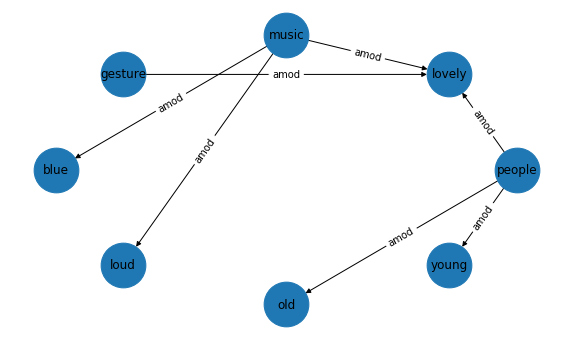

In [123]:
nx.draw(G, pos, node_size=2000)
plt.show()

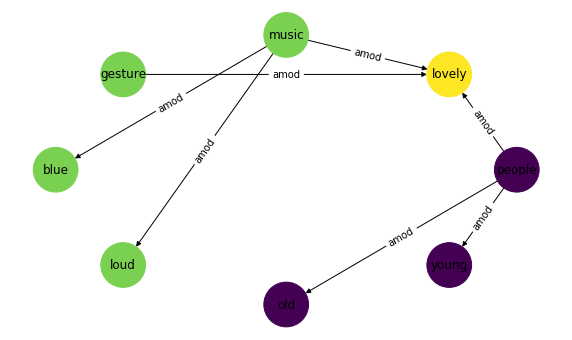

In [125]:
val_map = {'lovely': 1.0, 'music': 0.8, 'gesture': 0.8, 'blue': 0.8, 'loud': 0.8,}
values = [val_map.get(node, 0.0) for node in G.nodes()]
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, pos, node_size=2000, node_color=values)

<sub>Weir et al. [Aligning Packed Dependency Trees: A Theory of Composition for Distributional Semantics.](https://www.aclweb.org/anthology/J16-4006/) Computational Linguistics 42(4): 727-761 (2016)</sub>

<sub>Kober et al. [Improving Semantic Composition with Offset Inference.](https://aclweb.org/anthology/P17-2069/) ACL (2) 2017: 433-440</sub>

![Clever Bert](clever_bert.jpg)
- https://thegradient.pub/nlps-clever-hans-moment-has-arrived/
- https://thegradient.pub/frontiers-of-generalization-in-natural-language-processing/

So why am I talking about all of this? Because the way we test models of distributional semantics or distributional composition, like word vectors or APTs, or larger language models are themselves biased and don't account for the totality of language.

The exercise then is not about "understanding" language as such, but improving performance at some specific end task, maybe that task is machine translation or maybe it's sequence labelling. 

# Transformer and BERT

<center>
    <img src=transformer_overview.png alt="The Transformer" />
</center>

<sub>Vaswani et al., Attention is All you Need. NIPS 2017: 5998-6008</sub>

Sequence models like LSTMs or GRUs have a number of limitations that have become problematic for a number of reasons over the years:

- very long sequences can lead to exploding or vanishing gradients and possibly forgetting
- the recurrent architecture itself is not particularly well suited to modern hardware making RNNs expensive to train and operate

while the former has been addressed to some extent by Bidirectional LSTM networks there is no easy way to solve the second problem.

To resolve some of these issues the `Transformer` model was proposed by Vaswani et al. The model exclusively uses attention mechanisms to process sequence data and it is highly parallelisable.

- _Vaswani et al., [Attention is All you Need.](https://papers.nips.cc/paper/7181-attention-is-all-you-need) NIPS 2017: 5998-6008_
- _Devlin et al., [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding.](https://www.aclweb.org/anthology/N19-1423/) NAACL-HLT (1) 2019: 4171-4186_

---

- [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)
- [The Illustrated BERT, ELMo ...](https://jalammar.github.io/illustrated-bert/)
- [The Annotated Transformer](http://nlp.seas.harvard.edu/2018/04/03/attention.html)

---

<center>
    <img src=transformer_input.png alt="The Transformer Input Stage" />
</center>

# Byte Pair Encoding

- Sennrich et al., [Neural Machine Translation of Rare Words with Subword Units](https://aclweb.org/anthology/P16-1162/) ACL (1) 2016

<sub>"The main motivation ... is that the translation of some words is transparent ... even if they are novel ... based on translation of known subword units such as morphemes or phonemes."</sub>

<img src=finnish.jpg height=70% />

![Kuusi Palaa](kuusi_palaa.jpg)

### hängen = hang, fahren = drive

### erhängen = to hang yourself, erfahren = experience

### verhängen = impose, fine, verfahren = proceed

In [127]:
from typing import List
from itertools import zip_longest, cycle, chain

def align_token_idx(tokens: List[str]) -> str:
    idx = (f'{i:^8}' for i, _ in enumerate(tokens))
    idx_batches = zip_longest(*[iter(idx)]*8, fillvalue='')
    tokens = (f'{s:^8}' for i, s in enumerate(tokens))
    token_batches = zip_longest(*[iter(tokens)]*8, fillvalue='')
    sep = ''
    s = f'\n{sep:^64}\n'.join('\n'.join((''.join(idx), ''.join(toks))) 
                              for idx, toks in zip(idx_batches, token_batches))
    return s

In [128]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [129]:
print(align_token_idx(tokenizer.tokenize('The BERT tokenizer.')))

   0       1       2       3       4       5       6    
  The      BE     ##RT    tok    ##eni   ##zer     .    


In [135]:
print(align_token_idx(tokenizer.tokenize('The Berlin philharmonics.')))

   0       1       2       3       4       5       6    
  The    Berlin   phi    ##lha   ##rmon  ##ics     .    


In [136]:
print(align_token_idx(tokenizer.tokenize('The BER airport will open soon.')))

   0       1       2       3       4       5       6       7    
  The      BE     ##R   airport   will    open    soon     .    


In [131]:
print(align_token_idx(tokenizer.tokenize('I bought a coffee yesterday (5.11.2019) for 6.17$.')))

   0       1       2       3       4       5       6       7    
   I     bought    a     coffee    ye    ##ster  ##day     (    
                                                                
   8       9       10      11      12      13      14      15   
   5       .       11      .      2019     )      for      6    
                                                                
   16      17      18      19   
   .       17      $       .    


So let's load the BERT multilingual tokenizer and see what the tokenised text looks like in practice.

Notice that BERT is split in two, similar to how BER is split in two.

You as a user of this framework need to make a decision what to do with the subwords. Do you ignore them, keep them, downweight them? But, we're getting ahead of ourselves - attention!

# Attention

- [Augmented RNNs](https://distill.pub/2016/augmented-rnns/)
- https://www.youtube.com/watch?v=OYygPG4d9H0
- Lilian Weng [Attention Attention](https://lilianweng.github.io/lil-log/2018/06/24/attention-attention.html)

<center>
    <img src=transformer_input.png alt="The Transformer Input Stage" />
</center>

## BERT's Attention Model (self attention)

$$ Attention(Q, V, K) = softmax(\frac{QK^T}{\sqrt{d_k}})V $$

_"Self-attention, sometimes called intra-attention is an attention mechanism relating different positions of a single sequence in order to compute a representation of the sequence."_ *

_"We call our particular attention "Scaled Dot-Product Attention ..."_ *

<sub>* Vaswani et al., [Attention is All you Need.](https://papers.nips.cc/paper/7181-attention-is-all-you-need) NIPS 2017: 5998-6008</sub>